In [37]:
import scipy.stats as stats
from math import sqrt
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

EXERCISE 1. The hourly wages in a particular industry are normally distributed with mean $13.20 and standard deviation $2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826

population mean = 13.20
standart deviation = 2.50
sample = 40
sample mean = 12.20
α = 0.01

In [ ]:
First Step: Null Hypothesis And Alternative Hypothesis

H0: M = 13,20
H1: M < 13,20

In [ ]:
Second Step
Critical value z given α : left sided

<img src="https://statkat.com/images/critical-z-value-given-significance-level-left-sided.png" width=500 height=500/>


In [5]:
xbar = 12.20
n = 40
std = 2.50
M = 13.20

In [6]:
z_test = (xbar - M) / (std/np.sqrt(n))
z_test

-2.5298221281347035

In [8]:
#Calculate the p-value
p_value = stats.norm.cdf(z_test)
p_value

0.005706018193000826

In [11]:
α = 0.01
if p_value < α:
    print('Decision: At {} level of significance, we can reject the null hypothesis in favor of alternative hypothesis.'.format(α))
else:
    print('Decision: At {} level of significance, we fail to reject the null hypothesis.'.format(α))

Decision: At 0.01 level of significance, we can reject the null hypothesis in favor of alternative hypothesis.


EXERCISE 2.Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

<a href="https://docs.google.com/spreadsheets/d/1f2odmgDboIVuSV-A5gmuC25ppqQ5g1OIIF4h5EOqUcI/edit?usp=sharing">Result for Two type of soil</a>

CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06

In [14]:
import pandas as pd
df = pd.read_excel("soil.xlsx")

In [15]:
df.sample(5)

,Soil1,Soil2
31,NaN,1.172
20,1.570,1.183
7,1.347,1.373
12,1.665,1.395
34,NaN,1.355


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Soil1,30.0,1.691800,0.206903,1.110,1.572,1.675,1.86525,2.054
Soil2,35.0,1.417114,0.219184,1.053,1.231,1.379,1.55900,1.878


In [17]:
df.var()

Soil1    0.042809
Soil2    0.048042
dtype: float64

In [ ]:
Soil1:
    var1 = 0.0480
    n1 = 30
    xbar1 = 1.6918

In [ ]:
Soil2:
    var2 = 0.0480
    n2 = 35
    xbar2 = 1.4171

In [ ]:
α = 0.01

In [ ]:
Null Hypothesis and Alternatif Hypothesis Claim:
    H0: M1-M2 = 0
    H1: M1-M2 != 0

In [18]:
stats.ttest_ind(df.Soil1.dropna(), df.Soil2)

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.593228732352821e-06)

EXERCISE 3. The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.
CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

In [20]:
df1 = pd.read_excel("2015 PISA Test.xlsx")
df1

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375
...,...,...,...,...,...,...
65,TUN,AF,48.519836,366.8180,361.0555,386.4034
66,TUR,EU,53.744979,420.4540,428.3351,425.4895
67,URY,SA,64.600000,417.9919,436.5721,435.3630
68,USA,NaN,74.554202,469.6285,496.9351,496.2424


In [22]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
internet_users_per_100,70.0,71.973099,16.390632,21.976068,60.899020,72.99935,85.026763,98.2000
Math,70.0,460.971557,53.327205,327.702000,417.416075,477.60715,500.482925,564.1897
Reading,70.0,460.997291,49.502679,346.549000,426.948625,480.19985,499.687475,535.1002
Science,70.0,465.439093,48.397254,331.638800,425.923375,475.40005,502.431250,555.5747


In [24]:
df1.isnull().sum()

Country Code              0
Continent_Code            5
internet_users_per_100    0
Math                      0
Reading                   0
Science                   0
dtype: int64

In [25]:
df1[df1["Continent_Code"]=="EU"]["Math"]

0     413.1570
4     496.7423
5     506.9844
6     441.1899
9     521.2506
14    437.1443
15    492.3254
16    505.9713
17    511.0876
20    485.8432
21    519.5291
22    511.0769
23    492.9204
24    492.4785
26    453.6299
28    464.0401
29    476.8309
31    503.7220
32    488.0332
34    489.7287
40    478.3834
41    485.7706
42    482.3051
44    419.6635
46    371.3114
47    478.6448
48    417.9341
50    512.2528
51    501.7298
54    504.4693
55    491.6270
57    443.9543
58    494.0600
60    475.2301
61    509.9196
62    493.9181
66    420.4540
Name: Math, dtype: float64

In [26]:
df1[df1["Continent_Code"]=="AS"]["Math"]

1     427.4827
11    531.2961
25    403.8332
27    547.9310
30    386.1096
33    469.6695
35    380.2590
36    532.4399
37    459.8160
38    524.1062
39    396.2497
43    543.8078
49    446.1098
56    402.4007
59    564.1897
63    415.4638
69    494.5183
Name: Math, dtype: float64

<AxesSubplot:xlabel='Math'>

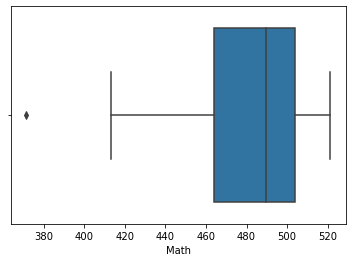

In [27]:
sns.boxplot(df1[df1["Continent_Code"]=="EU"]["Math"])

<AxesSubplot:xlabel='Math'>

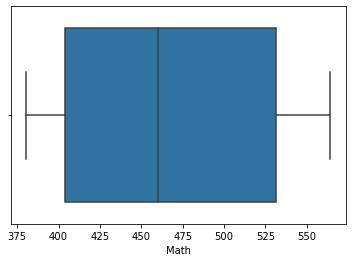

In [28]:
sns.boxplot(df1[df1["Continent_Code"]=="AS"]["Math"])

In [29]:
stats.ttest_ind(df1[df1["Continent_Code"]=="EU"]["Math"], df1[df1["Continent_Code"]=="AS"]["Math"])

Ttest_indResult(statistic=0.8700553179679787, pvalue=0.38826888111307556)

EXERCISE 4.  A gym operator organized a 2-month exercise and diet program for 15 customers suffering from their excess weight. To evaluate whether this diet program was effective, he measured the customers' starting and ending weights and recorded them in the computer. Did the exercise and diet program have an impact on customers' weight loss? Use an α = .01 level test.  Weight Dataset

CHECK: statistic=2.67808348404993, pvalue=0.00900646517506627

In [ ]:
sample size = 15
α = 0.01

In [30]:
df2 = pd.read_excel("weight.xlsx")
df2

,ID,starting,ending,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,1.0,76.0,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,81.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,86.0,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,71.0,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,88.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df = df2.iloc[0:15, 0:3]
df

,ID,starting,ending
0,1.0,76.0,72.0
1,2.0,81.0,82.0
2,3.0,86.0,84.0
3,4.0,71.0,71.0
4,5.0,88.0,83.0
5,6.0,78.0,74.0
6,7.0,76.0,70.0
7,8.0,81.0,80.0
8,9.0,79.0,78.0
9,10.0,77.0,79.0


In [35]:
df["difference"] = df["starting"] - df["ending"]
df["difference"]

0     4.0
1    -1.0
2     2.0
3     0.0
4     5.0
5     4.0
6     6.0
7     1.0
8     1.0
9    -2.0
10    3.0
11    1.0
12    2.0
13   -2.0
14    1.0
Name: difference, dtype: float64

In [34]:
df.mean()

ID             8.000000
starting      79.733333
ending        78.066667
difference     1.666667
dtype: float64

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,15.0,8.000000,4.472136,1.0,4.5,8.0,11.5,15.0
starting,15.0,79.733333,4.283968,71.0,77.0,79.0,82.0,88.0
ending,15.0,78.066667,4.605380,70.0,75.0,79.0,82.0,84.0
difference,15.0,1.666667,2.410295,-2.0,0.5,1.0,3.5,6.0


In [40]:
stats.ttest_rel(df["starting"], df["ending"], alternative = "greater")

Ttest_relResult(statistic=2.6780834840499255, pvalue=0.00900646517506626)

Conclusion: 
p_value = 0.0090
a = 0.01
p_value < a ----> we reject the null hypothesis